<a href="https://colab.research.google.com/github/spentaur/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module1-join-and-reshape-data/LS_DS_121_Join_and_Reshape_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

## Download data

We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-07-25 04:49:59--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.92.245
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.92.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.5’

instacart_online_gr 100%[===================>] 196.03M  45.9MB/s    in 4.7s    

2019-07-25 04:50:04 (42.0 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.5’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Join Datasets

## Goal: Reproduce this example

The first two orders for user id 1:

In [5]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

In [0]:
import pandas as pd

## Load data

Here's a list of all six CSV filenames

In [7]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


For each CSV
- Load it with pandas
- Look at the dataframe's shape
- Look at its head (first rows)
- `display(example)`
- Which columns does it have in common with the example we want to reproduce?

### aisles

In [8]:
aisles = pd.read_csv('aisles.csv')
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [9]:
display(example)

In [0]:
# none

### departments

In [11]:
departments = pd.read_csv('departments.csv')
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [0]:
# none

### order_products__prior

In [13]:
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [14]:
display(example)

In [0]:
# order_id, product_id

### order_products__train

In [16]:
order_products__train = pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [0]:
# order_id, product_id

### orders

In [18]:
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [19]:
display(example)

In [0]:
# order_id, user_id, order_num, order_dow, order_hour_of_day

### products

In [21]:
products = pd.read_csv('products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [0]:
# product_id, product_name

## Concatenate order_products__prior and order_products__train

In [23]:
order_products = pd.concat([order_products__prior, order_products__train])
print(order_products.shape)
order_products.head()

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
assert len(order_products) == len(order_products__prior) + len(order_products__train), 'Concatenate order_products__prior and order_products__train went wrong'

## Get a subset of orders — the first two orders for user id 1

From `orders` dataframe:
- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

In [25]:
user_1_first_2 = orders[['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day']].loc[(orders['user_id'] == 1) & (orders['order_number'] <= 2)]
print(user_1_first_2.shape)
user_1_first_2.head()

(2, 5)


,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7


In [26]:
[col for col in orders.columns if col not in ['eval_set', 'days_since_prior_order']]

['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day']

## Merge dataframes

Merge the subset from `orders` with columns from `order_products`

In [27]:
merged = pd.merge(user_1_first_2, order_products[['order_id', 'add_to_cart_order', 'product_id']], how='left', on='order_id')
print(merged.shape)
merged.head()

(11, 7)


,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id
0,1,2539329,1,2,8,1,196
1,1,2539329,1,2,8,2,14084
2,1,2539329,1,2,8,3,12427
3,1,2539329,1,2,8,4,26088
4,1,2539329,1,2,8,5,26405


In [28]:
user_1_first_2.shape, order_products.shape, merged.shape

((2, 5), (33819106, 4), (11, 7))

Merge with columns from `products`

In [29]:
final = pd.merge(merged, products[['product_id', 'product_name']], how='left', on='product_id')
print(final.shape)
final.head()

(11, 8)


,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
1,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
2,1,2539329,1,2,8,3,12427,Original Beef Jerky
3,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
4,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls


In [30]:
display(example)

# Reshape Datasets

## Why reshape data?

#### Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

#### Data science is often about putting square pegs in round holes

Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [32]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [33]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [34]:
table1.reset_index(inplace=True)
tidy = table1.melt(id_vars='index')
tidy

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [35]:
tidy = tidy.rename(columns={'index': 'name', 'variable': 'trt', 'value': 'result'})
tidy

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [36]:
tidy['trt'] = tidy['trt'].str.replace('treatment', '')
tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


## Table 2 --> Tidy

In [37]:
##### LEAVE BLANK --an assignment exercise #####
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [38]:
tidy2 = table2.stack(dropna=False).reset_index()
tidy2.columns = ['trt', 'name', 'result']
tidy2['trt'] = tidy2['trt'].str.replace('treatment', '')
tidy2 = tidy2[['name', 'trt', 'result']]
tidy2

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [39]:
wide = tidy.pivot_table(values='result', index='name', columns='trt')
wide

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


## Tidy --> Table 2

In [40]:
##### LEAVE BLANK --an assignment exercise #####
wide2 = tidy2.pivot_table(values='result', index='trt', columns='name')
wide2.index = ['treatmenta', 'treatmentb']
wide2 = wide2[['John Smith', 'Jane Doe', 'Mary Johnson']]
del wide2.columns.name
wide2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


# Seaborn example

The rules can be simply stated:

- Each variable is a column
- Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

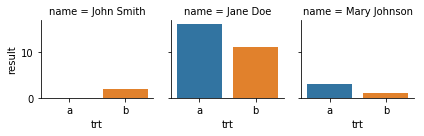

In [41]:
  sns.catplot(x='trt', y='result', col='name', 
            kind='bar', data=tidy, height=2);

## Now with Instacart data

In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [43]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

One challenge of performing a merge on this data is that the `products` and `orders` datasets do not have any common columns that we can merge on. Due to this we will have to use the `order_products` dataset to provide the columns that we will use to perform the merge.

In [0]:
product_names = [
    'Half And Half Ultra Pasteurized',
    'Half Baked Frozen Yogurt'
]

In [45]:
products.columns.to_list(), orders.columns.to_list(), order_products.columns.to_list()

(['product_id', 'product_name', 'aisle_id', 'department_id'],
 ['order_id',
  'user_id',
  'eval_set',
  'order_number',
  'order_dow',
  'order_hour_of_day',
  'days_since_prior_order'],
 ['order_id', 'product_id', 'add_to_cart_order', 'reordered'])

In [46]:
merged = (products[['product_id', 'product_name']]
          .merge(order_products[['product_id','order_id']])
          .merge(orders[['order_id', 'order_hour_of_day']]))
print(merged.shape)
merged.head()

(33819106, 4)


,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11


In [0]:
condition = merged['product_name'].isin(product_names)

In [48]:
subset = merged[condition]
print(subset.shape)
subset.head()

(5978, 4)


,product_id,product_name,order_id,order_hour_of_day
25086,30668,Half Baked Frozen Yogurt,595220,21
29409,30668,Half Baked Frozen Yogurt,3252348,16
33914,30668,Half Baked Frozen Yogurt,677455,17
34412,30668,Half Baked Frozen Yogurt,1821824,14
35652,30668,Half Baked Frozen Yogurt,1225489,17


## 4 ways to reshape and plot

### 1. value_counts

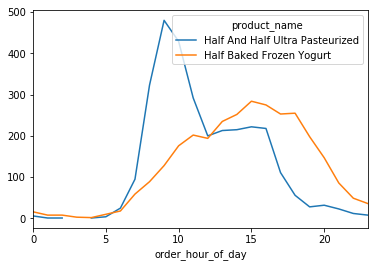

In [49]:
subset.groupby('order_hour_of_day')['product_name'].value_counts().unstack().plot();

### 2. crosstab

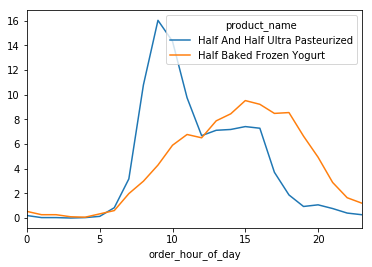

In [50]:
(pd.crosstab(subset['order_hour_of_day'], subset['product_name'],normalize='columns')*100).plot();

### 3. Pivot Table

### 4. melt

# Assignment

## Join Data Section

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
most_freq_products = """Banana
Bag of Organic Bananas
Organic Strawberries
Organic Baby Spinach
Organic Hass Avocado
Organic Avocado
Large Lemon
Strawberries
Limes
Organic Whole Milk"""
most_freq_products = most_freq_products.split("\n")

In [52]:
products.columns, orders.columns, order_products.columns

(Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object'),
 Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
        'order_hour_of_day', 'days_since_prior_order'],
       dtype='object'),
 Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object'))

In [53]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
# product_id, product_name, order_id
merged = order_products[['order_id', 'product_id']].merge(products[['product_id', 'product_name']], how="left")

In [55]:
top_10 = merged.loc[merged['product_name'].isin(most_freq_products)]
top_10.head()

,order_id,product_id,product_name
12,3,21903,Organic Baby Spinach
30,5,13176,Bag of Organic Bananas
51,5,47209,Organic Hass Avocado
77,10,24852,Banana
80,10,47766,Organic Avocado


In [56]:
top_10['product_name'].value_counts()

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

In [57]:
merged['product_name'].value_counts().head(10).index.tolist()

['Banana',
 'Bag of Organic Bananas',
 'Organic Strawberries',
 'Organic Baby Spinach',
 'Organic Hass Avocado',
 'Organic Avocado',
 'Large Lemon',
 'Strawberries',
 'Limes',
 'Organic Whole Milk']

In [0]:
# i dont think this is the intended way to do it?
# my thinking is the data is already tidied?

In [0]:
flights = sns.load_dataset('flights')

In [0]:
# Load seaborn's flights dataset by running the cell below. Then create a pivot 
# table showing the number of passengers by month and year. Use year for the 
# index and month for the columns. You've done it right if you get 112 
# passengers for January 1949 and 432 passengers for December 1960.

In [61]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [62]:
wide_flights = flights.pivot_table(index='year', columns='month', values='passengers')
wide_flights

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [0]:
##### YOUR CODE HERE #####

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [64]:
order_products.shape

(33819106, 4)

In [0]:
merged = (products[['product_id', 'product_name']]
          .merge(order_products[['product_id','order_id']])
          .merge(orders[['order_id', 'order_hour_of_day']]))

In [0]:
# get only top products 
popular_products = merged.groupby('product_name').size()

In [67]:
popular_products.shape

(49685,)

In [0]:
popular_products = popular_products.where(popular_products > 2900)
popular_products.dropna(inplace=True)
popular_products_names = popular_products.index.to_list()

In [69]:
popular_products

product_name
0% Fat Free Organic Milk                                                 4006.0
0% Greek Strained Yogurt                                                13651.0
1 Liter                                                                  4278.0
1% Low Fat Milk                                                          8933.0
1% Lowfat Milk                                                          14692.0
100 Calorie  Per Bag Popcorn                                            13374.0
100% Apple Juice                                                         5717.0
100% Cranberry Juice                                                     4871.0
100% Grated Parmesan Cheese                                              6080.0
100% Lactose Free Fat Free Milk                                          7556.0
100% Lactose Free Reduced Fat Calcium Enriched Milk                      3377.0
100% Lemon Juice                                                         4447.0
100% Natural Spring Water  

In [70]:
popular_products_df = popular_products.to_frame().reset_index()
popular_products_df.rename(columns={0:"count"}, inplace=True)
popular_products_df

,product_name,count
0,0% Fat Free Organic Milk,4006.0
1,0% Greek Strained Yogurt,13651.0
2,1 Liter,4278.0
3,1% Low Fat Milk,8933.0
4,1% Lowfat Milk,14692.0
5,100 Calorie Per Bag Popcorn,13374.0
6,100% Apple Juice,5717.0
7,100% Cranberry Juice,4871.0
8,100% Grated Parmesan Cheese,6080.0
9,100% Lactose Free Fat Free Milk,7556.0


In [71]:
popular_products_df.loc[popular_products_df['product_name'] == 'Pub Mix']

,product_name,count
1582,Pub Mix,4479.0


In [72]:
merged_popular = merged.loc[merged['product_name'].isin(popular_products_names)]
merged_popular.head()

,product_id,product_name,order_id,order_hour_of_day
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
6,12078,Shredded Mexican Blend Cheese,1107,11
7,13176,Bag of Organic Bananas,1107,11
8,16797,Strawberries,1107,11


In [0]:
# get mean hour for each product
mean_hour = merged_popular.groupby('product_name')['order_hour_of_day'].mean()
mean_hour
late = mean_hour.nlargest(25)
early = mean_hour.nsmallest(25)
late_names = mean_hour.nlargest(25).index.tolist()
early_names = mean_hour.nsmallest(25).index.tolist()
early_df = early.to_frame().reset_index()
late_df = late.to_frame().reset_index()
early_df, late_df = early_df.rename(columns={'order_hour_of_day': 'mean_hour_of_orders'}), late_df.rename(columns={'order_hour_of_day': 'mean_hour_of_orders'})

In [74]:
early_df

,product_name,mean_hour_of_orders
0,Half And Half Ultra Pasteurized,11.767279
1,Sweet & Salty Nut Granola Bars Peanut,11.898340
2,Pub Mix,12.004019
3,Nutri Grain Bars Multi Pack,12.049459
4,Trail Mix,12.059043
5,Original Rice Krispies Treats,12.114576
6,Apples,12.123962
7,Cheez-It Baked Snack Crackers,12.140281
8,Dry Roasted Almonds,12.151995
9,Zero Calorie Cola,12.168894


In [75]:
early_names_df = early_df.merge(popular_products_df.loc[popular_products_df['product_name'].isin(early_names)], how='left')
early_names_df

,product_name,mean_hour_of_orders,count
0,Half And Half Ultra Pasteurized,11.767279,2995.0
1,Sweet & Salty Nut Granola Bars Peanut,11.898340,4338.0
2,Pub Mix,12.004019,4479.0
3,Nutri Grain Bars Multi Pack,12.049459,3700.0
4,Trail Mix,12.059043,12601.0
5,Original Rice Krispies Treats,12.114576,4329.0
6,Apples,12.123962,12883.0
7,Cheez-It Baked Snack Crackers,12.140281,3992.0
8,Dry Roasted Almonds,12.151995,3033.0
9,Zero Calorie Cola,12.168894,8905.0


In [76]:
late_names_df = late_df.merge(popular_products_df.loc[popular_products_df['product_name'].isin(late_names)], how='left')
late_names_df

,product_name,mean_hour_of_orders,count
0,Half Baked Frozen Yogurt,14.526986,2983.0
1,The Tonight Dough™ Ice Cream,14.526299,3137.0
2,Americone Dream® Ice Cream,14.394912,6447.0
3,Half Baked® Ice Cream,14.388942,6222.0
4,Phish Food® Ice Cream,14.373308,3177.0
5,Milk and Cookies Ice Cream,14.369711,5223.0
6,Sicilian Pistachio,14.306421,3146.0
7,Chocolate Peanut Butter Cup Gelato,14.303480,4511.0
8,Birthday Cake Light Ice Cream,14.292018,5462.0
9,Cherry Garcia Ice Cream,14.270300,4495.0


In [0]:
late_names_df.sort_values(by="mean_hour_of_orders", ascending=False, inplace=True)

In [0]:
early_names_df.sort_values(by="mean_hour_of_orders", inplace=True)

In [0]:
late_df = merged_popular.loc[merged_popular['product_name'].isin(late_names)]
early_df = merged_popular.loc[merged_popular['product_name'].isin(early_names)]

In [80]:
late_df.head()

,product_id,product_name,order_id,order_hour_of_day
1033,40002,Strawberry Ice Cream,224060,12
4365,40002,Strawberry Ice Cream,839897,16
10390,40002,Strawberry Ice Cream,1957727,13
13769,40002,Strawberry Ice Cream,2524869,17
14075,27179,Rising Crust Pepperoni Pizza,2597068,13


In [81]:
early_ct = pd.crosstab(early_df['order_hour_of_day'], early_df['product_name'], normalize='columns')*100
early_ct

product_name,0% Greek Strained Yogurt,Apples,Cheez-It Baked Snack Crackers,Cheez-It Cheddar Cracker,Cinnamon Brown Sugar Breakfast Biscuits,Clementines,Crunchy Oats 'n Honey Granola Bars,Dry Roasted Almonds,Extra Fancy Unsalted Mixed Nuts,French Vanilla Coffee Creamer,Half And Half Cream,Half And Half Ultra Pasteurized,Milk Chocolate Almonds,Nutri Grain Bars Multi Pack,Orange & Lemon Flavor Variety Pack Sparkling Fruit Beverage,Original Almondmilk,Original Beef Jerky,Original Rice Krispies Treats,Pink Lady Apples,Popcorn,Pub Mix,Sweet & Salty Nut Granola Bars Peanut,Trail Mix,Zero Calorie Cola,with Crispy Almonds Cereal
order_hour_of_day,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.351623,0.380346,0.300601,0.606333,0.408942,0.587066,0.341335,0.362677,0.358923,0.257069,0.445879,0.200334,0.378931,0.270270,0.568855,0.650441,0.298641,0.369600,0.363011,0.394255,0.446528,0.230521,0.277756,0.381808,0.712219
1,0.168486,0.225103,0.150301,0.291938,0.109051,0.257812,0.198194,0.131883,0.199402,0.160668,0.322878,0.033389,0.284199,0.216216,0.165916,0.314729,0.194117,0.254100,0.363011,0.140805,0.111632,0.115260,0.190461,0.303200,0.111284
2,0.102557,0.163006,0.075150,0.202111,0.163577,0.192582,0.154151,0.065941,0.059821,0.321337,0.246002,0.033389,0.132626,0.189189,0.165916,0.167856,0.089592,0.231000,0.171953,0.112644,0.089306,0.138313,0.047615,0.157215,0.155798
3,0.087906,0.046573,0.025050,0.157197,0.136314,0.114928,0.088086,0.131883,0.089731,0.128535,0.107626,0.000000,0.132626,0.054054,0.071107,0.083928,0.044796,0.207900,0.133741,0.014081,0.044653,0.046104,0.047615,0.078608,0.155798
4,0.102557,0.085384,0.075150,0.089827,0.000000,0.158415,0.066065,0.098912,0.079761,0.160668,0.107626,0.033389,0.037893,0.027027,0.071107,0.314729,0.029864,0.092400,0.133741,0.084483,0.111632,0.115260,0.095231,0.123526,0.133541
5,0.219764,0.170768,0.150301,0.157197,0.190840,0.195689,0.220216,0.131883,0.109671,0.257069,0.184502,0.133556,0.094733,0.216216,0.237023,0.356693,0.074660,0.300300,0.401223,0.183047,0.111632,0.230521,0.166653,0.247052,0.267082
6,0.461505,0.791741,0.651303,0.628790,0.790622,0.795179,0.792777,0.923178,0.518445,1.221080,0.830258,0.834725,0.227359,0.621622,0.853283,1.195971,0.447962,0.508201,1.165457,0.605463,0.513507,0.760719,0.372986,0.505334,0.890274
7,2.080434,2.522704,2.154309,1.594431,2.371865,2.717898,2.003964,2.901418,1.824526,3.116967,2.536900,3.171953,1.288367,2.243243,2.156909,2.769618,2.120352,1.801802,2.980512,1.957195,1.763787,2.973721,1.991905,2.156092,2.960160
8,6.336532,7.863075,7.314629,6.220525,6.597601,7.054109,7.322176,6.693043,6.011964,7.230077,7.241697,10.784641,5.191360,6.891892,5.570040,7.952161,6.614902,6.329406,7.202904,7.166995,5.626256,8.068234,7.031188,6.546884,6.766081


In [82]:
late_ct = pd.crosstab(late_df['order_hour_of_day'], late_df['product_name'], normalize='columns')*100
late_ct

product_name,Americone Dream® Ice Cream,Birthday Cake Light Ice Cream,Caramel Cookie Crunch Gelato,Cherry Garcia Ice Cream,Chocolate Chip Cookie Dough Ice Cream,Chocolate Peanut Butter Cup Gelato,Chocolate Peanut Butter Ice Cream,Coconut Almond Minis Frozen Dessert Bars,Coffee Ice Cream,Half Baked Frozen Yogurt,Half Baked® Ice Cream,Mediterranean Mint Gelato,Milk and Cookies Ice Cream,Mint Chip,Mint Chocolate Chip Ice Cream,Phish Food® Ice Cream,Rising Crust Pepperoni Pizza,Roman Raspberry Sorbetto,Sea Salt Caramel Gelato,Sicilian Pistachio,Strawberry Ice Cream,The Tonight Dough™ Ice Cream,Vanilla Bean Ice Cream,Vanilla Bean Light Ice Cream,Vanilla Milk Chocolate Almond Ice Cream Bars
order_hour_of_day,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.527377,0.567558,0.629701,0.934372,0.549386,0.532033,0.766493,0.722543,0.685105,0.536373,0.707168,0.600836,0.765843,0.749446,0.642817,0.566572,0.284753,0.597672,0.573641,0.985378,0.561710,0.573797,0.581395,0.843799,0.769231
1,0.418799,0.347858,0.384817,0.311457,0.444185,0.177344,0.465371,0.346821,0.532860,0.268186,0.401800,0.261233,0.402068,0.374723,0.307434,0.188857,0.232980,0.314564,0.315503,0.381437,0.421283,0.255021,0.344531,0.333595,0.303030
2,0.139600,0.292933,0.139934,0.222469,0.175336,0.066504,0.301122,0.317919,0.253743,0.268186,0.208936,0.117555,0.191461,0.153296,0.167691,0.062952,0.232980,0.251651,0.100387,0.445010,0.265252,0.095633,0.193798,0.451334,0.349650
3,0.077555,0.164775,0.122442,0.133482,0.116891,0.133008,0.273748,0.260116,0.152246,0.100570,0.080360,0.169801,0.114877,0.136263,0.139743,0.094429,0.155320,0.125826,0.157751,0.254291,0.187237,0.286898,0.064599,0.255102,0.186480
4,0.108578,0.128158,0.244884,0.200222,0.163647,0.177344,0.355872,0.173410,0.253743,0.067047,0.144648,0.091432,0.172315,0.153296,0.111794,0.157381,0.129433,0.251651,0.172092,0.286078,0.093618,0.095633,0.172265,0.117739,0.163170
5,0.232666,0.146466,0.192409,0.088988,0.245470,0.199512,0.410621,0.115607,0.177620,0.335233,0.160720,0.261233,0.229753,0.238460,0.251537,0.283286,0.129433,0.188739,0.172092,0.158932,0.280855,0.223143,0.301464,0.294349,0.163170
6,0.651466,0.439399,0.752143,0.734149,0.654588,0.908889,1.313989,0.635838,0.608982,0.603419,0.466088,0.496343,0.593529,0.613183,0.642817,0.598048,0.621279,0.534759,0.659687,0.254291,0.546107,0.828817,0.473730,0.588697,0.419580
7,1.938886,1.885756,1.889103,1.624027,1.835184,1.729107,2.217356,1.878613,1.623953,1.977875,1.446480,2.155172,1.818878,1.703287,2.096143,1.857098,1.553197,2.013212,2.079449,1.525747,1.419878,1.657635,1.916451,1.883830,1.888112
8,3.396929,3.295496,3.305930,3.670745,3.787259,3.192197,3.859841,3.815029,3.298655,2.983574,3.262617,3.578892,3.561172,3.270312,3.409726,3.462386,3.624126,3.869141,4.158899,2.701844,3.245436,2.996493,3.875969,3.159341,3.613054


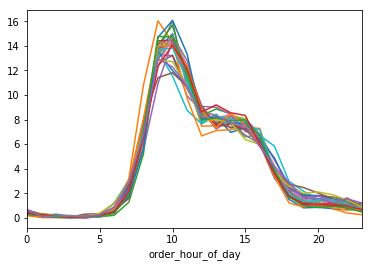

In [83]:
early_ct.plot(legend=False);

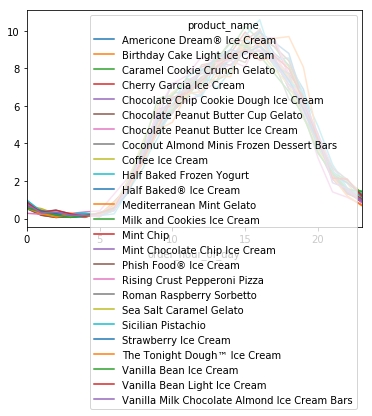

In [84]:
late_ct.plot();

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
early_product_names = early_names_df['product_name'].to_list()
early_product_names = '\n'.join(early_product_names)
late_product_names = late_names_df['product_name'].to_list()
late_product_names = '\n'.join(late_product_names)

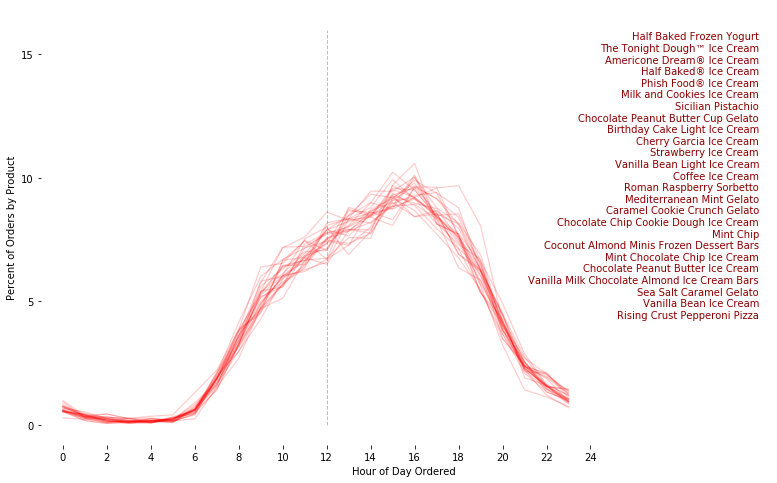

In [87]:
fig = plt.figure(figsize=(13,8))
ax = plt.axes()

late_ct.plot(ax=ax, 
             legend=False,
             alpha=0.2,
             color='red',
             linewidth=1.2)
# early_ct.plot(ax=ax, 
#              legend=False,
#              alpha=0.2,
#              color='green')

plt.xticks(range(0, 25, 2))
plt.yticks(range(0, 16, 5))
plt.xlim([-1, 32])

plt.vlines(x=12, ymin=0, ymax=16, alpha=0.5, color='gray', linestyle='dashed', linewidth=1.0)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.text(0.99, 0.95, late_product_names,
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='darkred', fontsize=10)

plt.xlabel('Hour of Day Ordered')
plt.ylabel('Percent of Orders by Product')

plt.show()

In [88]:
display(example)
# 1471 x 888

In [0]:
# Your challenge is to reproduce the list of the top 25 latest ordered popular products.
# We can also see the time of day that users purchase specific products
# get only products with more than 2900